# Supervised learning- tree-based methods + whitening the blackbox

# 0. Loading packages and dataset

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('real_estate_cleaned.csv')

# 1. Taking a look at the data

In [2]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,restaurants,groceries,nightlife,cafes,...,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition,roof_Gravel/rock,roof_Missing,roof_Other,roof_Shake shingle,basement_1.0,basement_Missing
0,12.597611,1,1,6.371612,2013,8.388054,4.682131,2.302585,3.433987,2.995732,...,0,1,0,0,0,1,0,0,0,1
1,12.285350,1,1,6.418365,1965,8.388054,4.663439,2.772589,1.945910,2.639057,...,0,0,0,1,0,0,0,0,1,0
2,12.542191,1,1,6.423247,1963,8.388054,5.214936,2.639057,3.465736,3.433987,...,0,1,0,0,0,1,0,0,0,1
3,12.847666,1,1,6.428105,2000,10.420554,5.293305,2.302585,3.663562,3.258097,...,0,1,0,0,0,1,0,0,0,1
4,12.736704,1,1,6.453625,1992,8.388054,5.010635,2.079442,3.135494,3.044522,...,0,0,0,0,0,1,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tx_price                            803 non-null    float64
 1   beds                                803 non-null    int64  
 2   baths                               803 non-null    int64  
 3   sqft                                803 non-null    float64
 4   year_built                          803 non-null    int64  
 5   lot_size                            803 non-null    float64
 6   restaurants                         803 non-null    float64
 7   groceries                           803 non-null    float64
 8   nightlife                           803 non-null    float64
 9   cafes                               803 non-null    float64
 10  shopping                            803 non-null    float64
 11  arts_entertainment                  803 non-n

# 2. Train/test-split

0. Shuffle the dataset (randomize)
1. Split the predictor columns from the response column
2. Perform a train/test split on the dataset
3. Standardize the dataset

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_shuffle = df.sample(frac=1, random_state=123)

X = df_shuffle.drop(columns='tx_price')
y = df_shuffle['tx_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

num = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

# Create copies of the original dataframes for standardization
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
# Standardize the numerical features
X_train_stand[num] = scaler.fit_transform(X_train[num])
X_test_stand[num] = scaler.transform(X_test[num])

X_test_stand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 7 to 599
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   beds                                161 non-null    float64
 1   baths                               161 non-null    float64
 2   sqft                                161 non-null    float64
 3   year_built                          161 non-null    float64
 4   lot_size                            161 non-null    float64
 5   restaurants                         161 non-null    float64
 6   groceries                           161 non-null    float64
 7   nightlife                           161 non-null    float64
 8   cafes                               161 non-null    float64
 9   shopping                            161 non-null    float64
 10  arts_entertainment                  161 non-null    float64
 11  beauty_spas                         161 non-null  

# 3. Decision trees

1. Perform a crossvalidation, using DecisionTreeRegressor, with depth ranging from 1 to 50
  
2. Plot the depth to the R2
    + First do a general plot
    + Then zoom in on the highest values 
    + Which depth leads to the highest R2?

    




1. cross-validation

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

depth = np.arange(1, 51)
cv_scores = []
sd_scores = []

for d in depth:
    dec_tree = DecisionTreeRegressor(max_depth=d, random_state=0)
    scores = cross_val_score(dec_tree, X_train_stand, y_train, cv=5, scoring='r2')
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var()) / np.sqrt(5))


2. plots

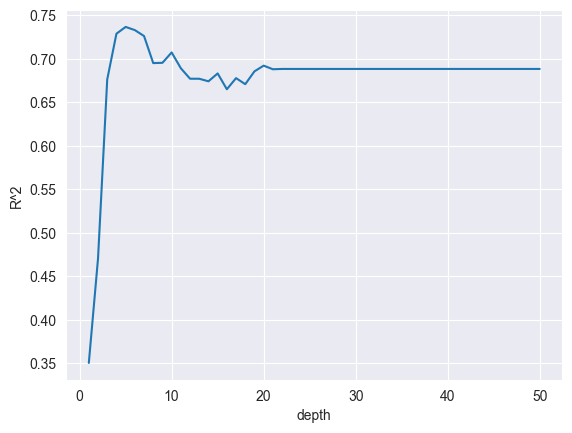

The best depth is 5
The validated score is 0.7364177734388406


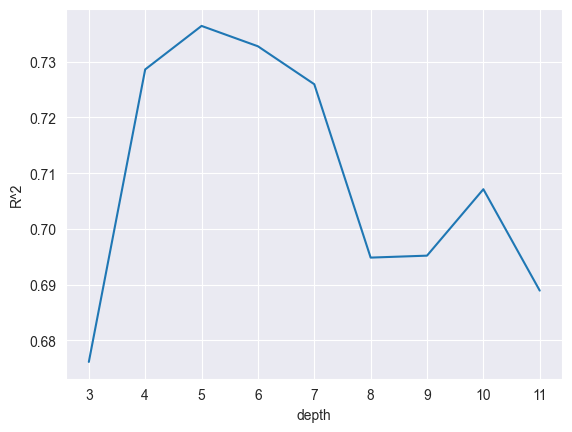

In [6]:

max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(depth, cv_scores)
plt.xlabel('depth')
plt.ylabel('R^2')


plt.show()
print('The best depth is', depth[max_index])
print('The validated score is', max_value)

plt.plot(depth[2:11], cv_scores[2:11])
plt.xlabel('depth')
plt.ylabel('R^2')

plt.show()

In [7]:
dec_tree = DecisionTreeRegressor(random_state = 0, max_depth=4)
dec_tree.fit(X_train_stand, y_train)
print(dec_tree.score(X_train_stand, y_train) )
dec_tree.score(X_test_stand, y_test)#%% md
# Supervised learning- tree-based methods + whitening the blackbox

0.8147975018568473


0.7498618816083306

# 0. Loading packages and dataset

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('real_estate_cleaned.csv')

# 1. Taking a look at the data

In [9]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,restaurants,groceries,nightlife,cafes,...,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition,roof_Gravel/rock,roof_Missing,roof_Other,roof_Shake shingle,basement_1.0,basement_Missing
0,12.597611,1,1,6.371612,2013,8.388054,4.682131,2.302585,3.433987,2.995732,...,0,1,0,0,0,1,0,0,0,1
1,12.285350,1,1,6.418365,1965,8.388054,4.663439,2.772589,1.945910,2.639057,...,0,0,0,1,0,0,0,0,1,0
2,12.542191,1,1,6.423247,1963,8.388054,5.214936,2.639057,3.465736,3.433987,...,0,1,0,0,0,1,0,0,0,1
3,12.847666,1,1,6.428105,2000,10.420554,5.293305,2.302585,3.663562,3.258097,...,0,1,0,0,0,1,0,0,0,1
4,12.736704,1,1,6.453625,1992,8.388054,5.010635,2.079442,3.135494,3.044522,...,0,0,0,0,0,1,0,0,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tx_price                            803 non-null    float64
 1   beds                                803 non-null    int64  
 2   baths                               803 non-null    int64  
 3   sqft                                803 non-null    float64
 4   year_built                          803 non-null    int64  
 5   lot_size                            803 non-null    float64
 6   restaurants                         803 non-null    float64
 7   groceries                           803 non-null    float64
 8   nightlife                           803 non-null    float64
 9   cafes                               803 non-null    float64
 10  shopping                            803 non-null    float64
 11  arts_entertainment                  803 non-n

# 2. Train/test-split

0. Shuffle the dataset (randomize)
1. Split the predictor columns from the response column
2. Perform a train/test split on the dataset
3. Standardize the dataset

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_shuffle = df.sample(frac=1, random_state=123)

X = df_shuffle.drop(columns='tx_price')
y = df_shuffle['tx_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

num = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

# Create copies of the original dataframes for standardization
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
# Standardize the numerical features
X_train_stand[num] = scaler.fit_transform(X_train[num])
X_test_stand[num] = scaler.transform(X_test[num])

X_test_stand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 7 to 599
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   beds                                161 non-null    float64
 1   baths                               161 non-null    float64
 2   sqft                                161 non-null    float64
 3   year_built                          161 non-null    float64
 4   lot_size                            161 non-null    float64
 5   restaurants                         161 non-null    float64
 6   groceries                           161 non-null    float64
 7   nightlife                           161 non-null    float64
 8   cafes                               161 non-null    float64
 9   shopping                            161 non-null    float64
 10  arts_entertainment                  161 non-null    float64
 11  beauty_spas                         161 non-null  

# 3. Decision trees

1. Perform a crossvalidation, using DecisionTreeRegressor, with depth ranging from 1 to 50

2. Plot the depth to the R2
    + First do a general plot
    + Then zoom in on the highest values
    + Which depth leads to the highest R2?






1. cross-validation

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

depth = np.arange(1, 51)
cv_scores = []
sd_scores = []

for d in depth:
    dec_tree = DecisionTreeRegressor(max_depth=d, random_state=0)
    scores = cross_val_score(dec_tree, X_train_stand, y_train, cv=5, scoring='r2')
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var()) / np.sqrt(5))


2. plots

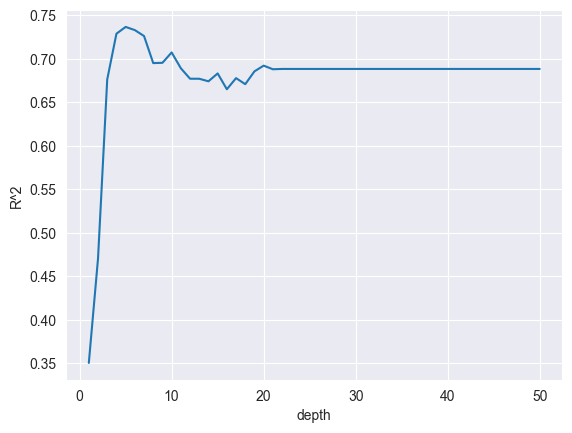

The best depth is 5
The validated score is 0.7364177734388406


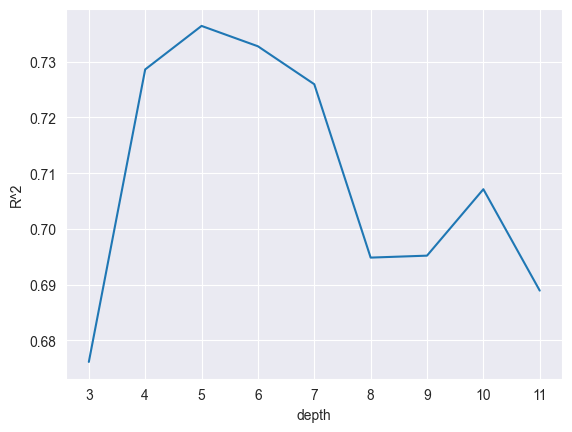

In [13]:

max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(depth, cv_scores)
plt.xlabel('depth')
plt.ylabel('R^2')


plt.show()
print('The best depth is', depth[max_index])
print('The validated score is', max_value)

plt.plot(depth[2:11], cv_scores[2:11])
plt.xlabel('depth')
plt.ylabel('R^2')

plt.show()

In [14]:
dec_tree = DecisionTreeRegressor(random_state = 0, max_depth=4)
dec_tree.fit(X_train_stand, y_train)
print(dec_tree.score(X_train_stand, y_train) )
dec_tree.score(X_test_stand, y_test)

0.8147975018568473


0.7498618816083306

# 4. Random forest
Let's see if we can improve the previous result (the validated R2) by using random forests.

1. Perform a  random search cross-validation using  RandomForestRegressor with the following hyperparameters
    + criterion:  squared_error, absolute_error
    + n_estimators: choose 200 values, ranging from 100 to 500
    + max_features: auto, sqrt, log2
    + max_depth: let it range from 1 to 15
    + min_samples_split: let it range from 2 to 15: why not from 1 to 15?
    + min_samples_leaf: let it range from 1 to 15
    + max_leaf_nodes: choose 490 values, ranging from 10 to 500

    + use random_state=42
    + use 3 folds
    + fit 100 random models

2. Print out the training and validated $R^2$ for the best model from the random search

3. Print out the parameters of the best model

4. Plot the results for all hyperparameters
     + First make a general plot for all results and all hyperparameters
     + Then make plots for all hyperparameters, but only the models where the R2 is above 0.7, to get a better idea which parameters you will use in the grid search.

5. Perform a grid search. Choose the parameters that you include in this search yourself
      + Since this is just a labo and you do not want to wait hours for the results, limit the choices. For an assignment, you should add more options.
      + print out the best model


1. Random search

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion =['squared_error','absolute_error']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 200)]
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 490)]


random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}

# cross-validatoin
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs=-1)
# n_jobs=-1 to run as many models  parallel as possible
rf_random.fit(X_train_stand, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'max_leaf_nodes': [10, 11, 12, 13, 14,
                                                           15, 16, 17, 18, 19,
                                                           20, 21, 22, 23, 24,
                                                           25, 26, 27, 28, 29,
                                                           30, 31, 32, 33, 34,
                                                           35, 36, 37, 38, 39, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15],
                                        'n_estimators': [100, 102, 104, 106,
                                                         108, 110, 112, 114,
                                                         116, 118, 120, 122,
                                                         124, 126, 128, 130,
                                                         132, 134, 136, 138,
                                                         140, 142, 144, 146,
                                                         148, 150, 152, 154,
                                                         156, 158, ...]},
                   random_state=42, verbose=2)

2. Print out the training and validated $R^2$ for the best model from the random search


In [16]:
print(rf_random.score(X_train_stand, y_train))
print(rf_random.best_score_)

0.9470395128608018
0.8097301882556959


3. print out the parameters of the best model

In [17]:
print(rf_random.best_params_)
out = pd.DataFrame(rf_random.cv_results_)
out.head()

{'n_estimators': 116, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_leaf_nodes': 306, 'max_depth': 9, 'criterion': 'squared_error'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.156721,0.169381,0.044582,0.002823,337,4,10,495,11,absolute_error,"{'n_estimators': 337, 'min_samples_split': 4, ...",0.762324,0.761508,0.734161,0.752664,0.013088,53
1,1.913884,0.114190,0.058506,0.004808,491,2,9,359,10,squared_error,"{'n_estimators': 491, 'min_samples_split': 2, ...",0.772236,0.782973,0.754461,0.769890,0.011757,41
2,1.069016,0.078458,0.031000,0.002451,226,9,4,106,7,squared_error,"{'n_estimators': 226, 'min_samples_split': 9, ...",0.804297,0.822320,0.782234,0.802950,0.016393,12
3,8.127406,0.179546,0.063516,0.011343,445,14,14,298,6,absolute_error,"{'n_estimators': 445, 'min_samples_split': 14,...",0.739943,0.705293,0.667615,0.704284,0.029536,85
4,7.725649,0.609668,0.041441,0.010692,252,3,1,114,6,absolute_error,"{'n_estimators': 252, 'min_samples_split': 3, ...",0.802864,0.828791,0.764798,0.798818,0.026281,19


4. Plot the results  for the hyperparameters

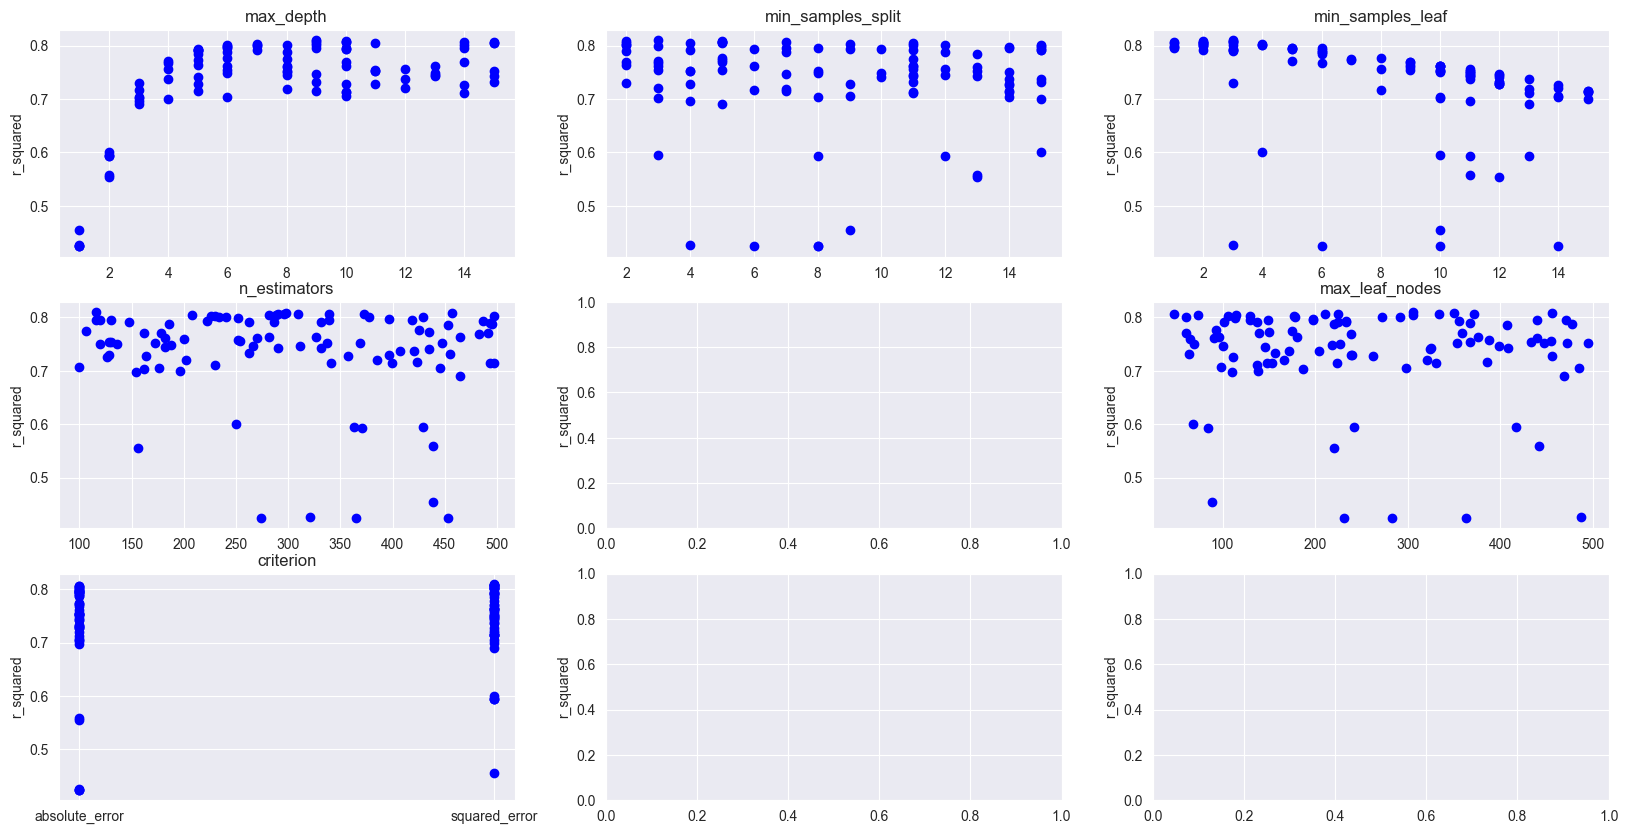

In [18]:
label_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
               'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out['param_max_depth'], out['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out['param_min_samples_split'], out['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out['param_n_estimators'], out['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')


axs[1,2].scatter(out['param_max_leaf_nodes'], out['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out['param_criterion'], out['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

for ax in axs.flat:
    ax.set(ylabel='r_squared')


best score is 10, but i see 7 and 9 are not to far fraom 10, so i will use 7 or 9


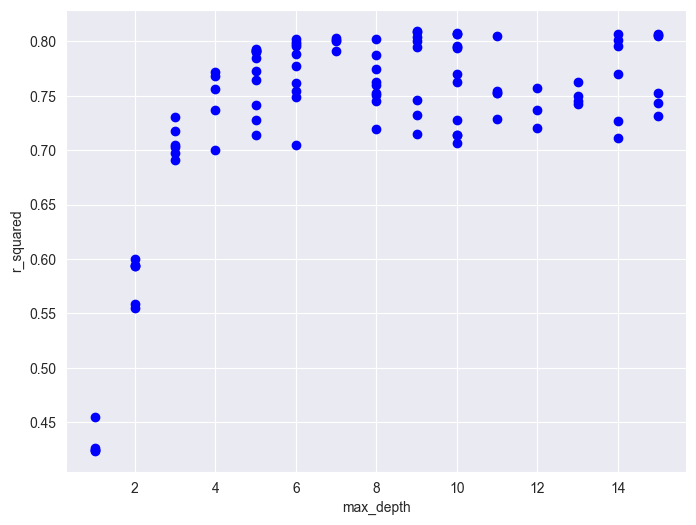

In [19]:

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_max_depth'], out['mean_test_score'], c='blue');
ax.set_xlabel("max_depth");
ax.set_ylabel("r_squared");

print('best score is 10, but i see 7 and 9 are not to far fraom 10, so i will use 7 or 9')

best score was 5, but 7 and 9 are not so far from 5, so i take 7 & 9.


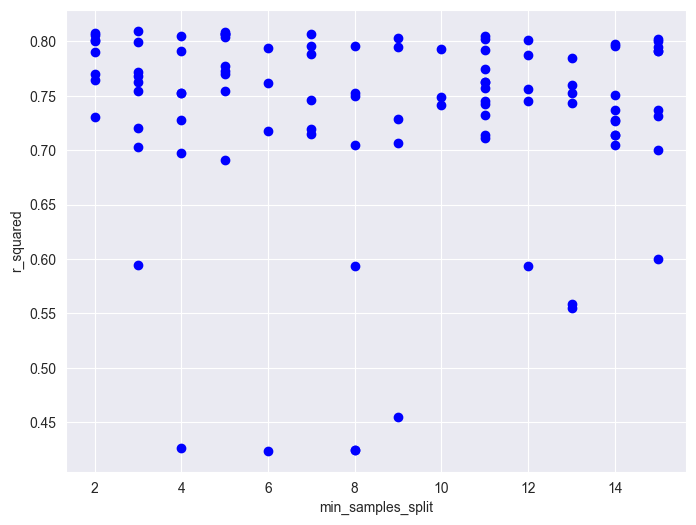

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_min_samples_split'], out['mean_test_score'], c='blue');
ax.set_xlabel("min_samples_split");
ax.set_ylabel("r_squared");
print('best score was 5, but 7 and 9 are not so far from 5, so i take 7 & 9.')

best score was 2, but 3 is not so far from 2, so i take 2 & 3.


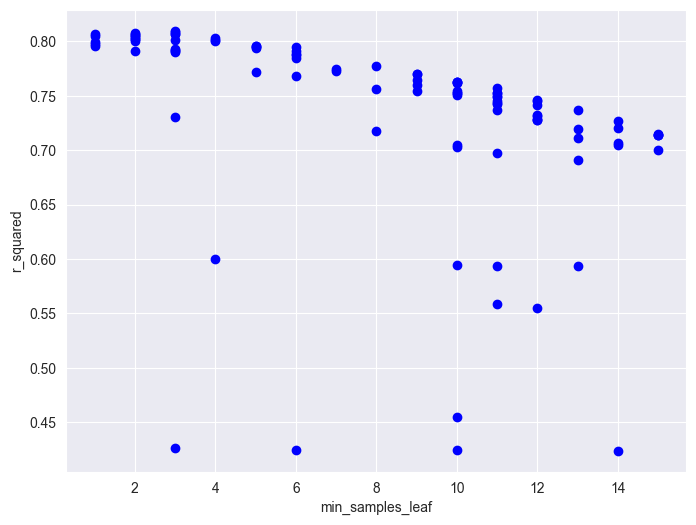

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
ax.set_xlabel("min_samples_leaf");
ax.set_ylabel("r_squared");

print('best score was 2, but 3 is not so far from 2, so i take 2 & 3.')

the best n_estimators score is 339, around 300 is a bit the same, so i take 339 & 300


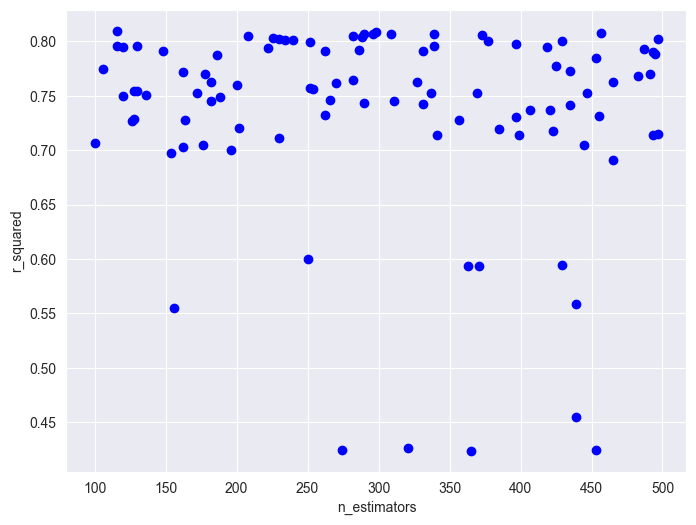

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_n_estimators'], out['mean_test_score'], c='blue');
ax.set_xlabel("n_estimators");
ax.set_ylabel("r_squared");

print('the best n_estimators score is 339, around 300 is a bit the same, so i take 339 & 300')

Best score was 372. Lets add a few scores around that score 370 - 374


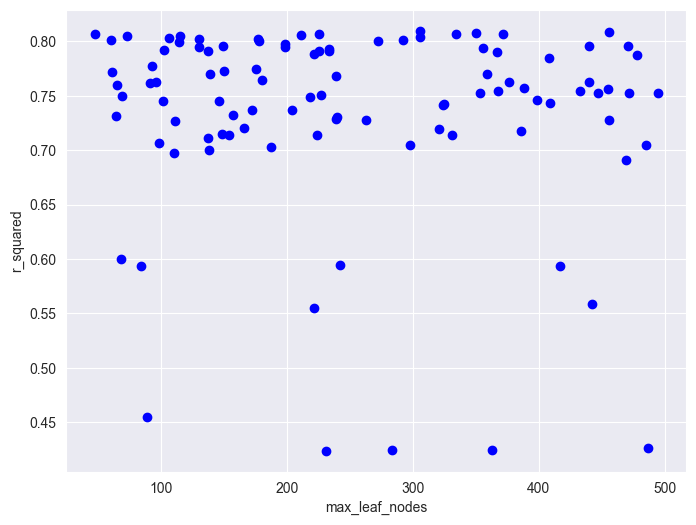

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_max_leaf_nodes'], out['mean_test_score'], c='blue');
ax.set_xlabel("max_leaf_nodes");
ax.set_ylabel("r_squared");

print('Best score was 372. Lets add a few scores around that score 370 - 374')

squared error had the best score,we use mse


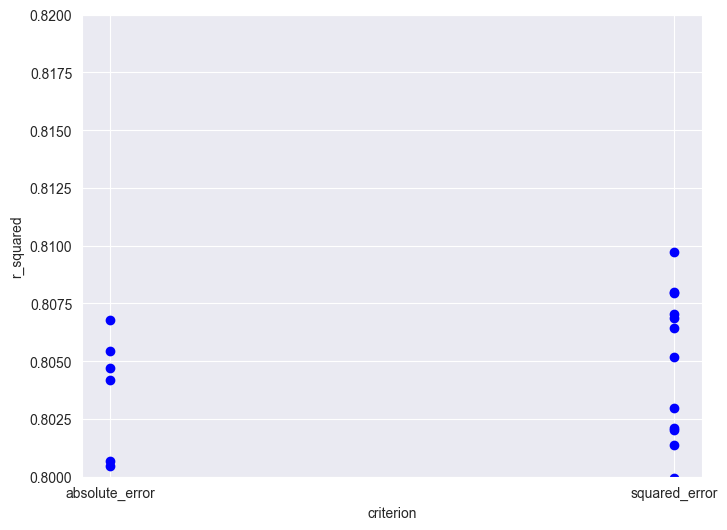

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(out['param_criterion'], out['mean_test_score'], c='blue');
ax.set_xlabel("criterion");
ax.set_ylabel("r_squared");
ax.set_ylim([0.8,0.82]);

print('squared error had the best score,we use mse')

5. Grid search

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion =['squared_error']
n_estimators = [300,339]
max_depth = [7,9]
min_samples_split = [7,9]
min_samples_leaf = [2,3]
max_leaf_nodes = [370,374]

# create the random grid to search for best hyperparameters
grid = {'criterion': criterion,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_leaf_nodes': max_leaf_nodes
        }



# then do cross-validatoin
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = grid,
                       cv = 5, verbose=2,  n_jobs=-1)
# n_jobs=-1 to run as many models  parallel as possible
rf_grid.fit(X_train_stand, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_depth': [7, 9],
                         'max_leaf_nodes': [370, 374],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [7, 9],
                         'n_estimators': [300, 339]},
             verbose=2)

In [26]:
rf_grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_leaf_nodes': 370,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 339}

In [27]:
print('R2: %.3f' % rf_grid.score(X_train_stand, y_train))
print('R2: %.3f' % rf_grid.best_score_)

params = rf_grid.best_params_
rf_gridBest = RandomForestRegressor(**params)
rf_gridBest.fit(X_train_stand, y_train)

print('The random forest gives us the best model untill now. (compared to linear regression, lasso regression and random forest')

R2: 0.950
R2: 0.823
The random forest gives us the best model untill now. (compared to linear regression, lasso regression and random forest


# 3. Whitening the black box

Untill now we have focussed on getting a model that performs as best as possible. But let's shift our attention now. How do we interpret these models?
1. Which features are important: Plot the feature importances
    + Which five features are most important?
2. What is the influence of a certain feature?
    + Get the predictions from the random forest.
    + Perform one univariate linear regressions per feature on the predicted values!
        + Use the standardized features and also standardize the predictions, to make the interpretation easier
    + Look at the direction of the effect for the five most important features
3. Why is a prediction what it is?
    + Use lime to get an idea of how the prediction of observation 100 was made

1. Plot the feature importances

In [28]:
list(zip(X_train.columns, rf_gridBest.feature_importances_))

[('beds', np.float64(0.0009925844164672285)),
 ('baths', np.float64(0.0017200444809813541)),
 ('sqft', np.float64(0.017374443470323606)),
 ('year_built', np.float64(0.018828964631989013)),
 ('lot_size', np.float64(0.007098758173985884)),
 ('restaurants', np.float64(0.003323592843991481)),
 ('groceries', np.float64(0.003660216388246355)),
 ('nightlife', np.float64(0.0021224545229250246)),
 ('cafes', np.float64(0.0029509863448599844)),
 ('shopping', np.float64(0.004438109797804805)),
 ('arts_entertainment', np.float64(0.004067414332809333)),
 ('beauty_spas', np.float64(0.002970777437367435)),
 ('active_life', np.float64(0.005779245243692272)),
 ('median_age', np.float64(0.0059980898084713175)),
 ('married', np.float64(0.007104829953072611)),
 ('college_grad', np.float64(0.007212624351190846)),
 ('property_tax', np.float64(0.15382636517300438)),
 ('insurance', np.float64(0.5181150211974249)),
 ('median_school', np.float64(0.002437706784907073)),
 ('num_schools', np.float64(0.0003460460286

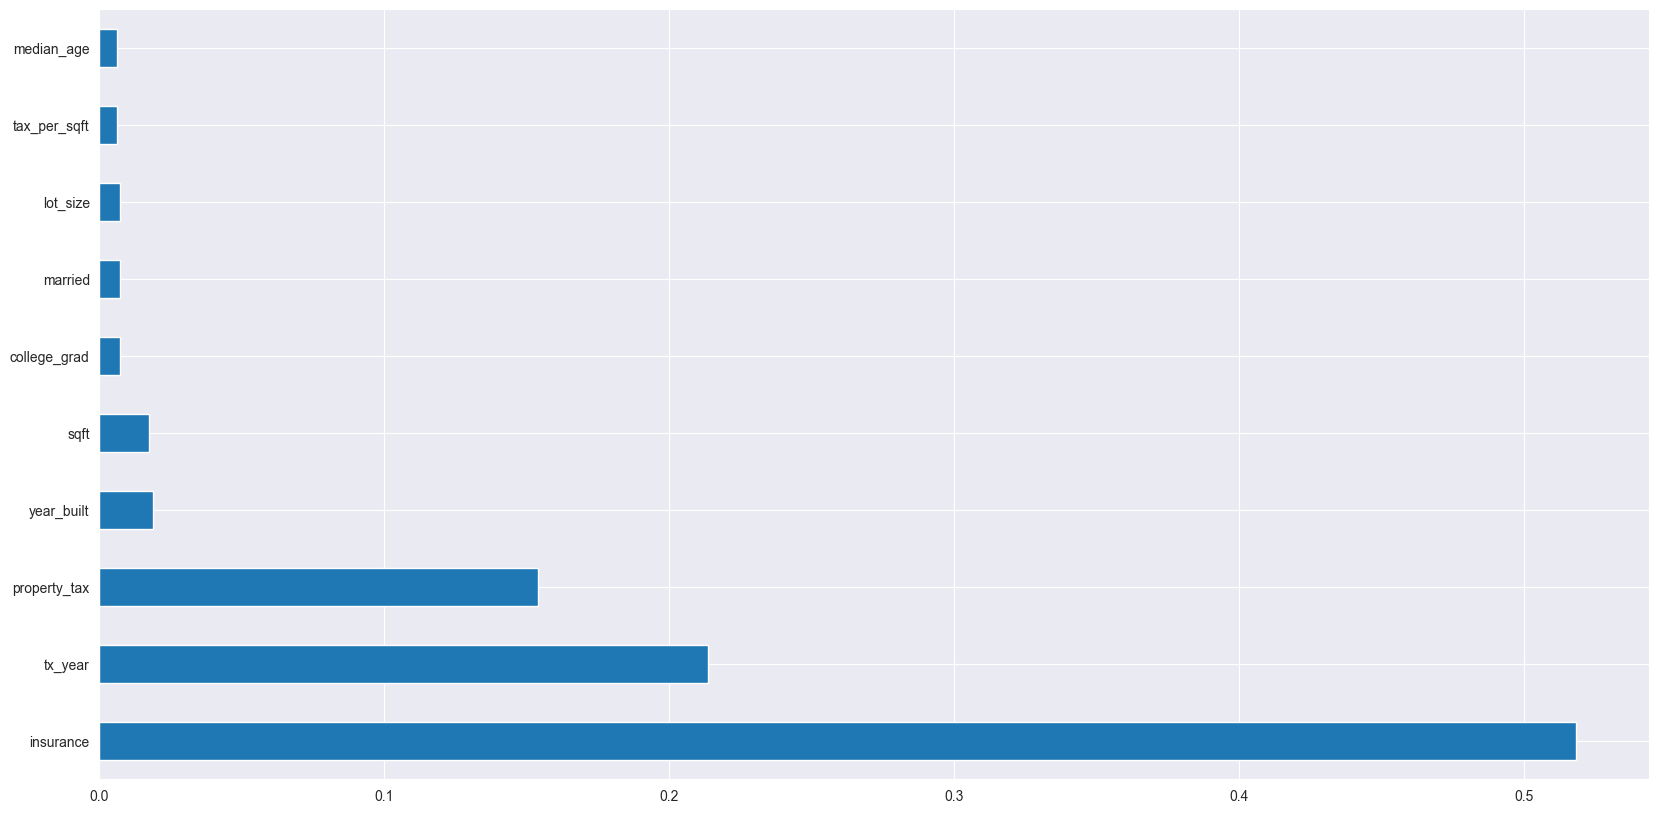

5 most important ones are: insurance, tx_year, property_tax, year_built, sqft


In [29]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))

feat_importances = pd.Series(rf_gridBest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print('5 most important ones are: insurance, tx_year, property_tax, year_built, sqft')

2. What is the influence of a certain feature?

,0,1
0,beds,0.268249
0,baths,0.318920
0,sqft,0.436076
0,year_built,0.234484
0,lot_size,-0.090094
0,restaurants,0.139475
0,groceries,0.089612
0,nightlife,0.158844
0,cafes,0.158275
0,shopping,0.127024


+ get the predictions from the random forest.

In [35]:
pred_train = rf_gridBest.predict(X_train_stand)

+ Perform one univariate linear regressions per feature on the predicted values!

In [37]:
from sklearn.linear_model import LinearRegression

scaler2 = StandardScaler()
X_train_stand2 = X_train.copy()
X_train_stand2 = scaler.fit_transform(X_train)

X = pd.DataFrame(X_train_stand2)
X.columns = X_train.columns
predictors =  X_train.columns


y = np.array((pred_train-pred_train.mean())/np.sqrt(pred_train.var())).reshape(-1, 1)
reg = LinearRegression().fit(X[[predictors[0]]], y)
beta = pd.Series(reg.coef_[0])
names = pd.Series(predictors[0])

for i in np.arange(1,(X.shape[1])):
    reg = LinearRegression().fit(X[[predictors[i]]], y)
    beta_help = pd.Series(reg.coef_[0])
    names_help = pd.Series(predictors[i])
    beta = pd.concat([beta,beta_help], axis=0)
    names = pd.concat([names,names_help], axis=0)
betas = pd.concat([names,beta],axis=1)
betas

,0,1
0,beds,0.268249
0,baths,0.318920
0,sqft,0.436076
0,year_built,0.234484
0,lot_size,-0.090094
0,restaurants,0.139475
0,groceries,0.089612
0,nightlife,0.158844
0,cafes,0.158275
0,shopping,0.127024


3. Why is a prediction what it is?


In [50]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

# creating the explainer function
explainer = LimeTabularExplainer(X_train_stand.values, mode="regression", feature_names=X_train.columns)

# storing a new observation
i = 100
X_test_stand = pd.DataFrame(X_test_stand)
X_test_stand.columns = X_train.columns

X_observation = X_test_stand.iloc[[i], :]
# explanation using the random forest model
explanation = explainer.explain_instance(X_observation.values[0], rf_gridBest.predict)
explanation.show_in_notebook(show_table=True, show_all=False)

print('We can see that the prediction for this point is 12.94 (middel of the left bar). By permuting the values of the different features, the prediction ranged from 12.31 to 13.49. In the table on the right, we can see the point itself. In the graph in the middle, you can see how the features influence the point. So, if the insurance is above 0;55, this will have a positive impact on the prediction (the prediction will be higher).')

C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


We can see that the prediction for this point is 12.94 (middel of the left bar). By permuting the values of the different features, the prediction ranged from 12.31 to 13.49. In the table on the right, we can see the point itself. In the graph in the middle, you can see how the features influence the point. So, if the insurance is above 0;55, this will have a positive impact on the prediction (the prediction will be higher).


# 5. Gradient boosting
Let's try one last algorithm for regression.

1. Perform a  random search cross-validation using  GradientBoostingRegressor with the following hyperparameters
    + criterion: squared_error
    + n_estimators: choose 50 values, ranging from 100 to 500
    + max_features: auto, sqrt, log2
    + max_depth: let it range from 1 to 15
    + min_samples_split: let it range from 2 to 15: why not from 1 to 15?
    + min_samples_leaf: let it range from 1 to 15
    + max_leaf_nodes: choose 50 values, ranging from 10 to 500
    + loss:  huber
    + learning_rate = choose 10 values, ranging from 0.1 to 1

    + use random_state=42
    + use 3 folds
    + fit 100 random models

2. Print out the training and validated $R^2$ for the best model from the random search

3. Print out the parameters of the best model

4. Plot the results for all hyperparameters
     + First make a general plot for all results and all hyperparameters
     + Then make plots for all hyperparameters, but only the models where the R2 is above 0.7, to get a better idea which parameters you will use in the grid search.

5. Perform a grid search. Choose the parameters that you include in this search yourself
      + Since this is just a labo and you do not want to wait hours for the results, limit the choices. For an assignment, you could add more options.
      + print out the best model


1. Perform random search

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

criterion = ['squared_error']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 50)]
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 50)]
loss = ['huber']
learning_rate = [round(x,5) for x in np.logspace(start = 0.1, stop = 1, num = 10)]

# create the random grid to search for best hyperparameters
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes,
               'loss': loss,
               'learning_rate': learning_rate}

# then do cross-validatoin
gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 100,
                                cv = 3, verbose=2, random_state=42, n_jobs=-1)
gbm_random.fit(X_train_stand, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [            -inf             -inf             -inf -2.78084672e+000
  2.34873383e-001 -2.96175842e+181 -2.84096568e+123 -5.88841746e+246
              nan  5.47391339e-001  3.69425972e-001  5.82455964e-001
  5.56787870e-001              nan -6.15649384e+076             -inf
 -6.45816418e+251             -inf              nan -6.01004704e+132
 -5.72914659e+000              nan  7.32888646e-002 -8.05312528e+139
 -6.01714076e+082             -inf             -inf -1.69258342e+168
 -1.51168933e+195             -inf -8.55718916e+144             -inf
  4.39774597e-001 -8.95629512e+273             -inf -7.14948748e+000
  5.87887031e-001 -3.53812857e+117 -3.88177512e+208 -2.23644887e-002
 -3.35880044e+248  3.15650529e-001 -1.29703243e+291  3.81326908e-001
 -5.29006595e+190  3.43854445e-001              nan -2.5511

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error'],
                                        'learning_rate': [np.float64(1.25893),
                                                          np.float64(1.58489),
                                                          np.float64(1.99526),
                                                          np.float64(2.51189),
                                                          np.float64(3.16228),
                                                          np.float64(3.98107),
                                                          np.float64(5.01187),
                                                          np.float64(6.30957),
                                                          np.float64(7.94328),
                                                          np.float64(10.0)],
                                        '...
                                                           150, 160, 170, 180,
                                                           190, 200, 210, 220,
                                                           230, 240, 250, 260,
                                                           270, 280, 290, 300, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15],
                                        'n_estimators': [100, 108, 116, 124,
                                                         132, 140, 148, 157,
                                                         165, 173, 181, 189,
                                                         197, 206, 214, 222,
                                                         230, 238, 246, 255,
                                                         263, 271, 279, 287,
                                                         295, 304, 312, 320,
                                                         328, 336, ...]},
                   random_state=42, verbose=2)

2. Test best model

In [73]:
print(gbm_random.score(X_train_stand, y_train))
gbm_random.best_score_


0.934535285177079


np.float64(0.7485454814504374)

3. print out the parameters of the best model

In [72]:
gbm_random.best_params_

{'n_estimators': 393,
 'min_samples_split': 6,
 'min_samples_leaf': 14,
 'max_leaf_nodes': 260,
 'max_depth': 1,
 'loss': 'huber',
 'learning_rate': np.float64(1.25893),
 'criterion': 'squared_error'}

4. Plot the results of the hyperparameters

In [69]:
out = pd.DataFrame(gbm_random.cv_results_)
out.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,param_loss,param_learning_rate,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.743701,0.115339,0.026339,0.027347,238,11,8,60,6,huber,7.94328,squared_error,"{'n_estimators': 238, 'min_samples_split': 11,...",-inf,-inf,-inf,-inf,NaN,64
1,2.917829,0.072552,0.007669,0.000942,393,10,4,60,4,huber,6.30957,squared_error,"{'n_estimators': 393, 'min_samples_split': 10,...",-inf,-inf,-inf,-inf,NaN,64
2,2.586885,0.161044,0.033664,0.017824,361,7,6,180,4,huber,6.30957,squared_error,"{'n_estimators': 361, 'min_samples_split': 7, ...",-inf,-inf,-inf,-inf,NaN,64
3,4.605147,0.199068,0.008677,0.001020,410,13,12,80,11,huber,1.99526,squared_error,"{'n_estimators': 410, 'min_samples_split': 13,...",-3.837321,-4.349705,-1.955475,-3.380834,1.029359,21
4,1.938379,0.188621,0.005666,0.000471,442,9,2,190,11,huber,1.58489,squared_error,"{'n_estimators': 442, 'min_samples_split': 9, ...",0.185089,0.091485,0.430300,0.235625,0.142862,17


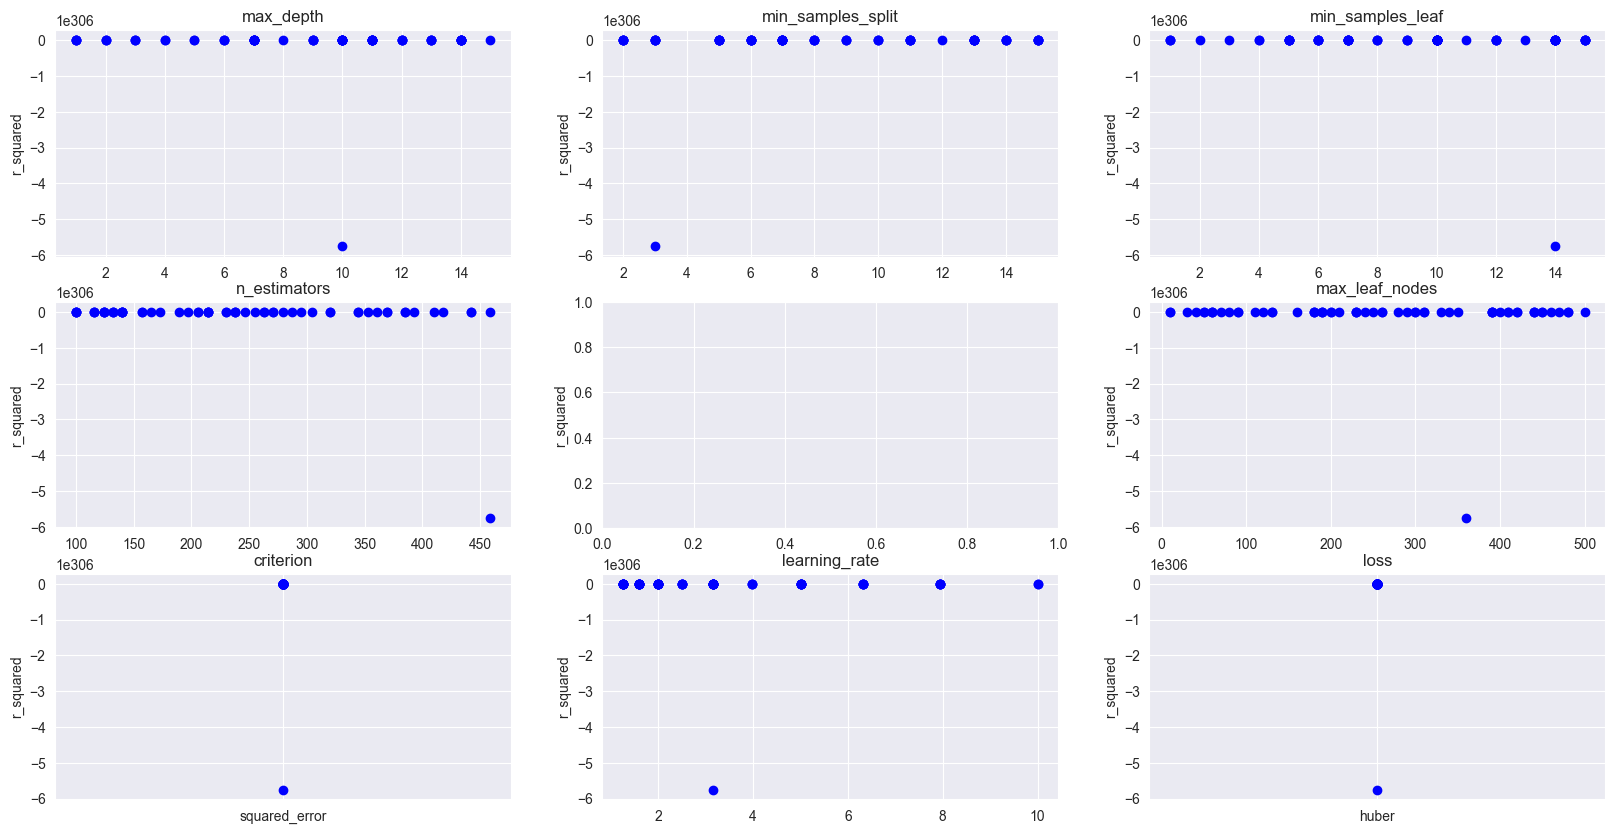

In [70]:
out2 = out

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out2['param_max_depth'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out2['param_min_samples_split'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out2['param_min_samples_leaf'], out2['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out2['param_n_estimators'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')


axs[1,2].scatter(out2['param_max_leaf_nodes'], out2['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out2['param_criterion'], out2['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

axs[2,1].scatter(out2['param_learning_rate'], out2['mean_test_score'], c='blue');
axs[2,1].set_title('learning_rate')

axs[2,2].scatter(out2['param_loss'], out2['mean_test_score'], c='blue');
axs[2,2].set_title('loss')


for ax in axs.flat: ax.set(ylabel='r_squared')

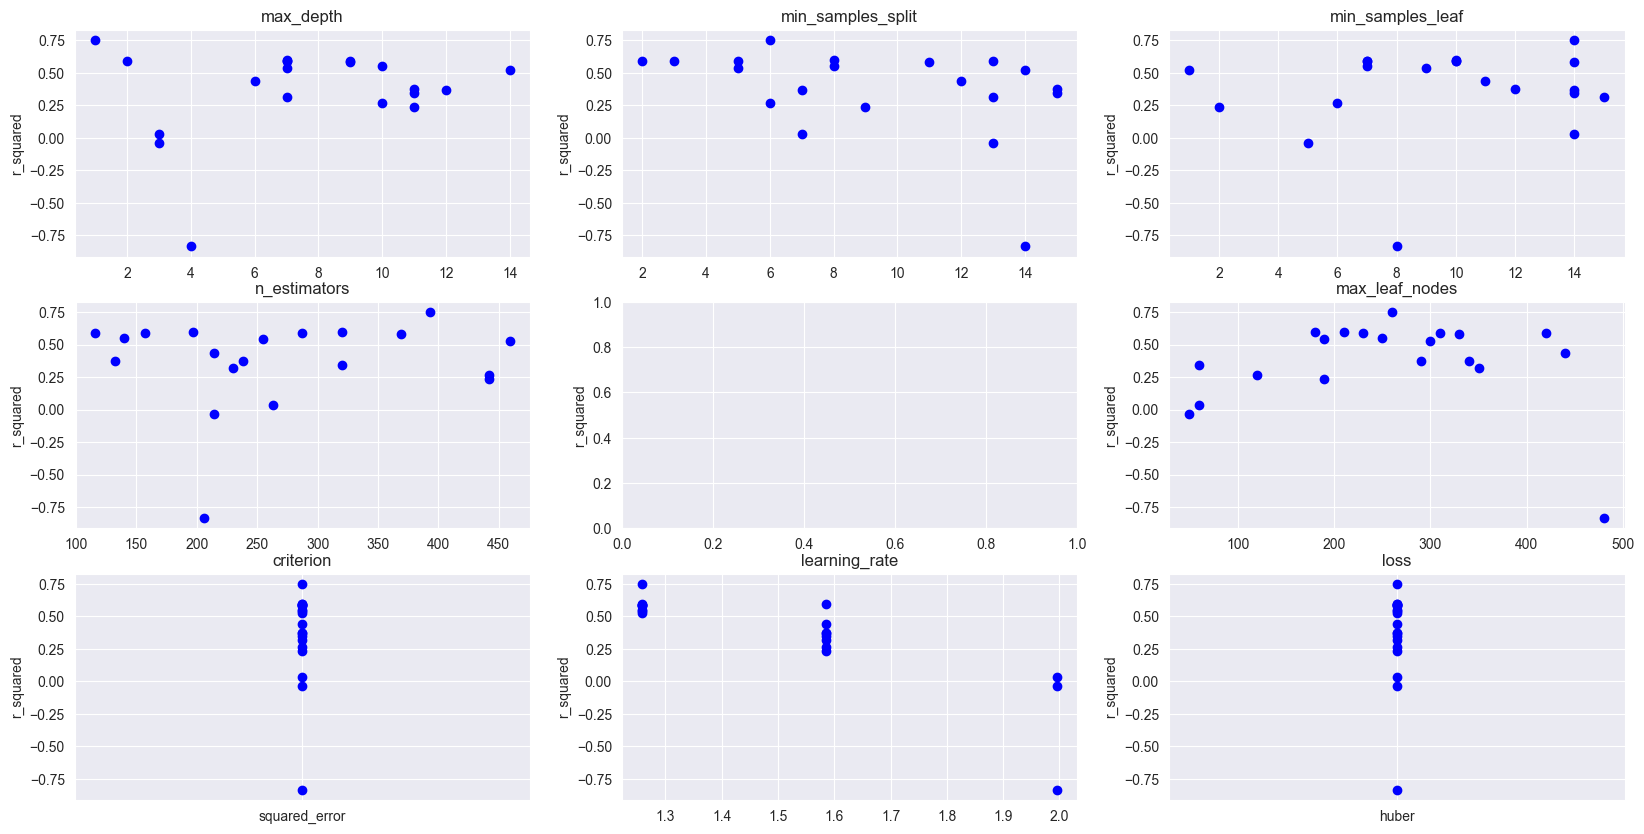

In [90]:
out2 = out[out.mean_test_score > -1]


xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out2['param_max_depth'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out2['param_min_samples_split'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out2['param_min_samples_leaf'], out2['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out2['param_n_estimators'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')


axs[1,2].scatter(out2['param_max_leaf_nodes'], out2['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out2['param_criterion'], out2['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

axs[2,1].scatter(out2['param_learning_rate'], out2['mean_test_score'], c='blue');
axs[2,1].set_title('learning_rate')

axs[2,2].scatter(out2['param_loss'], out2['mean_test_score'], c='blue');
axs[2,2].set_title('loss')

for ax in axs.flat: ax.set(ylabel='r_squared')


5. Grid search

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion =['squared_error']
n_estimators = [390,400]
max_depth = [1,2]
min_samples_split = [5,6]
min_samples_leaf = [14 ]
max_leaf_nodes = [260,300]
learning_rate = [1,1.3]
loss = ['huber']

# create the random grid to search for best hyperparameters
grid = {'criterion': criterion,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_leaf_nodes': max_leaf_nodes,
        'learning_rate': learning_rate,
        'loss':loss}

# then do cross-validatoin
gbm = GradientBoostingRegressor()
gbm_grid = GridSearchCV(estimator = gbm, param_grid = grid,
                        cv = 5, verbose=2,  n_jobs=-1)
# n_jobs=-1 to run as many models  parallel as possible
gbm_grid.fit(X_train_stand, y_train)



Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'learning_rate': [1, 1.3], 'loss': ['huber'],
                         'max_depth': [1, 2], 'max_leaf_nodes': [260, 300],
                         'min_samples_leaf': [14], 'min_samples_split': [5, 6],
                         'n_estimators': [390, 400]},
             verbose=2)

In [92]:
print(gbm_grid.best_params_)
print(gbm_random.score(X_train_stand, y_train))
gbm_random.best_score_

{'criterion': 'squared_error', 'learning_rate': 1, 'loss': 'huber', 'max_depth': 1, 'max_leaf_nodes': 260, 'min_samples_leaf': 14, 'min_samples_split': 5, 'n_estimators': 390}
0.934535285177079


np.float64(0.7487849727017322)

# 6. Final evaluation
+ Choose the model with the best validated score from this labo
+ Retrain the model on the whole training set
+ Evaluate on the test set

In [94]:
params = gbm_grid.best_params_
gbm_gridBest = GradientBoostingRegressor(**params)
gbm_gridBest.fit(X_train, y_train)
print(gbm_gridBest.score(X_train, y_train))
print(gbm_gridBest.score(X_test, y_test))

0.9243907932373129
0.7771299520192464
